In [2]:
import pandas as pd

try:
    file_path = 'StudentPerformanceFactors.csv'
    student_data = pd.read_csv(file_path)

    print("Dataset loaded successfully! Here are the first 5 rows:")
    print(student_data.head())

except FileNotFoundError:
   
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the CSV file is in the correct directory.")

except Exception as e:
    print(f"An unexpected error occurred: {e}")



Dataset loaded successfully! Here are the first 5 rows:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Se

In [3]:
import pandas as pd

print("--- Dataset Info ---")
student_data.info()
print("\n" + "="*50 + "\n")
print("--- Descriptive Statistics (Numerical Columns) ---")
print(student_data.describe())
print("\n" + "="*50 + "\n")

rows, columns = student_data.shape
print(f"--- Dataset Shape ---")
print(f"The dataset has {rows} rows and {columns} columns.")



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence             

In [4]:
import pandas as pd

print("--- Missing Values Count in Each Column ---")

print(student_data.isnull().sum())
print("\n" + "="*50 + "\n")

score_data = student_data[['Hours_Studied', 'Exam_Score']]

print("--- New DataFrame with Selected Columns ---")
print("Successfully created a new DataFrame with only the required columns.")
print("Here are the first 5 rows of the new data:")
print(score_data.head())
print("\n" + "="*50 + "\n")

print("--- Data Types of New DataFrame ---")
score_data.info()



--- Missing Values Count in Each Column ---
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


--- New DataFrame with Selected Columns ---
Successfully created a new DataFrame with only the required columns.
Here are the first 5 rows of the new data:
   Hours_Studied  Exam_Score
0             23          67
1             19          61
2             24          74
3        

--- Generating Scatter Plot ---


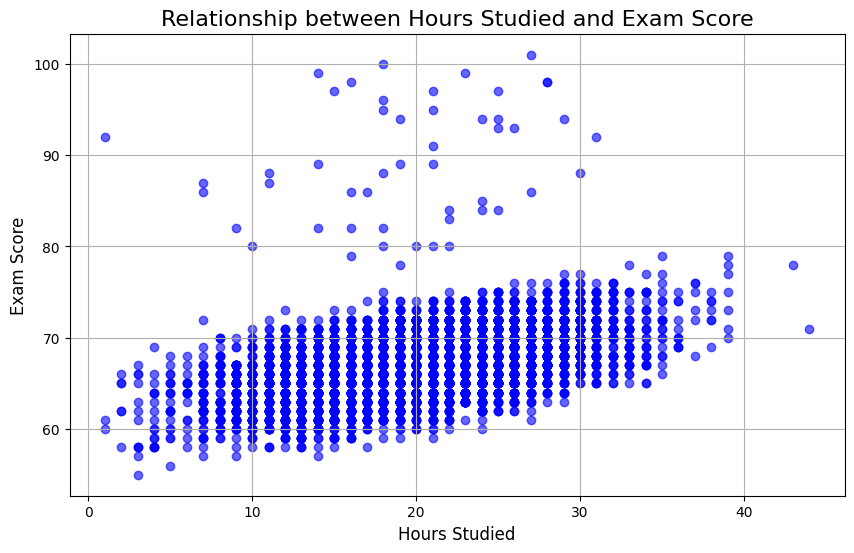

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

print("--- Generating Scatter Plot ---")
plt.figure(figsize=(10, 6))
plt.scatter(score_data['Hours_Studied'], score_data['Exam_Score'], alpha=0.6, color='blue')

plt.title('Relationship between Hours Studied and Exam Score', fontsize=16)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(True)

plt.show()



In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = score_data[['Hours_Studied']] 
y = score_data['Exam_Score']

print("--- Data Preparation ---")
print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")
print("\n" + "="*50 + "\n")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Data Splitting ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print("\n" + "="*50 + "\n")

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("--- Model Training ---")
print("Linear Regression model has been successfully trained!")
print(f"Intercept (b): {regressor.intercept_}")
print(f"Coefficient/Slope (m): {regressor.coef_[0]}")
print("\nThe model has learned the equation: Score = {:.2f} * Hours + {:.2f}".format(regressor.coef_[0], regressor.intercept_))



--- Data Preparation ---
Shape of X (features): (6607, 1)
Shape of y (target): (6607,)


--- Data Splitting ---
X_train shape: (5285, 1)
X_test shape: (1322, 1)
y_train shape: (5285,)
y_test shape: (1322,)


--- Model Training ---
Linear Regression model has been successfully trained!
Intercept (b): 61.511167469044246
Coefficient/Slope (m): 0.2856687444430867

The model has learned the equation: Score = 0.29 * Hours + 61.51


In [7]:
import pandas as pd
from sklearn import metrics
import numpy as np

y_pred = regressor.predict(X_test)

print("--- Predictions Made ---")
print("Successfully made predictions on the test data.")
print("\n" + "="*50 + "\n")

comparison_df = pd.DataFrame({'Actual_Score': y_test, 'Predicted_Score': y_pred})

print("--- Comparison of Actual vs. Predicted Scores (First 10) ---")
print(comparison_df.head(10))
print("\n" + "="*50 + "\n")
print("--- Model Performance Metrics ---")

mae = metrics.mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

mse = metrics.mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

r2 = metrics.r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2:.2f}')



--- Predictions Made ---
Successfully made predictions on the test data.


--- Comparison of Actual vs. Predicted Scores (First 10) ---
      Actual_Score  Predicted_Score
743             65        67.224542
5551            65        67.795880
3442            71        67.510211
6571            64        64.939192
4204            66        67.510211
2516            66        67.510211
4047            72        72.080911
1706            66        68.367217
1075            70        66.367536
233             70        66.081867


--- Model Performance Metrics ---
Mean Absolute Error (MAE): 2.45
Mean Squared Error (MSE): 10.86
R-squared (R²): 0.23


--- Generating Final Visualization ---


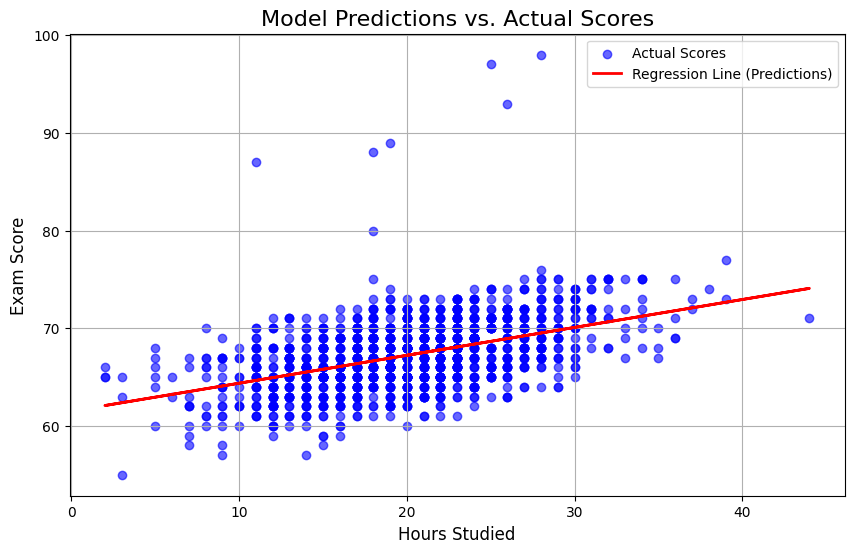

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

print("--- Generating Final Visualization ---")

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual Scores')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line (Predictions)')
plt.title('Model Predictions vs. Actual Scores', fontsize=16)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np


try:
   
    full_data = pd.read_csv('StudentPerformanceFactors.csv')
    score_data = full_data[['Hours_Studied', 'Exam_Score']]

    X = score_data[['Hours_Studied']]
    y = score_data['Exam_Score']
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    
    simple_regressor = LinearRegression()
    simple_regressor.fit(X_train, y_train)
    y_pred_simple = simple_regressor.predict(X_test)
    r2 = metrics.r2_score(y_test, y_pred_simple)

    print("--- Prerequisite Data Loaded and Split Successfully ---")

except FileNotFoundError:
    print("Error: 'StudentPerformanceFactors.csv' not found. Please ensure the file is in the correct directory.")
except Exception as e:
    print(f"An error occurred during data setup: {e}")

print("\n" + "="*50 + "\n")

poly_features = PolynomialFeatures(degree=2, include_bias=False)


X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

print("--- Polynomial Feature Transformation ---")
print(f"Original X_train shape: {X_train.shape}")
print(f"Transformed X_train_poly shape: {X_train_poly.shape}")
print("The new shape shows we now have two features per data point.")
print("\n" + "="*50 + "\n")

poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train)

print("--- Polynomial Model Training ---")
print("Polynomial Regression model has been successfully trained!")
print("\n" + "="*50 + "\n")

y_pred_poly = poly_regressor.predict(X_test_poly)

print("--- Polynomial Model Performance Metrics ---")
mae_poly = metrics.mean_absolute_error(y_test, y_pred_poly)
mse_poly = metrics.mean_squared_error(y_test, y_pred_poly)
r2_poly = metrics.r2_score(y_test, y_pred_poly)

print(f'Mean Absolute Error (MAE): {mae_poly:.2f}')
print(f'Mean Squared Error (MSE): {mse_poly:.2f}')
print(f'R-squared (R²): {r2_poly:.2f}')
print("\n" + "="*50 + "\n")


print("--- Model Comparison ---")
print(f"Simple Linear Regression R²: {r2:.2f}")
print(f"Polynomial Regression R²: {r2_poly:.2f}")

if r2_poly > r2:
    print("\nConclusion: The Polynomial model is a better fit than the Simple Linear model.")
else:
    print("\nConclusion: The Polynomial model is not a better fit than the Simple Linear model.")


--- Prerequisite Data Loaded and Split Successfully ---


--- Polynomial Feature Transformation ---
Original X_train shape: (5285, 1)
Transformed X_train_poly shape: (5285, 2)
The new shape shows we now have two features per data point.


--- Polynomial Model Training ---
Polynomial Regression model has been successfully trained!


--- Polynomial Model Performance Metrics ---
Mean Absolute Error (MAE): 2.44
Mean Squared Error (MSE): 10.84
R-squared (R²): 0.23


--- Model Comparison ---
Simple Linear Regression R²: 0.23
Polynomial Regression R²: 0.23

Conclusion: The Polynomial model is a better fit than the Simple Linear model.


--- Prerequisite Data and Model Ready ---


--- Generating Polynomial Regression Plot ---


C:\Users\rajaz\OneDrive\Documents\GitHub\Student-Score-Prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


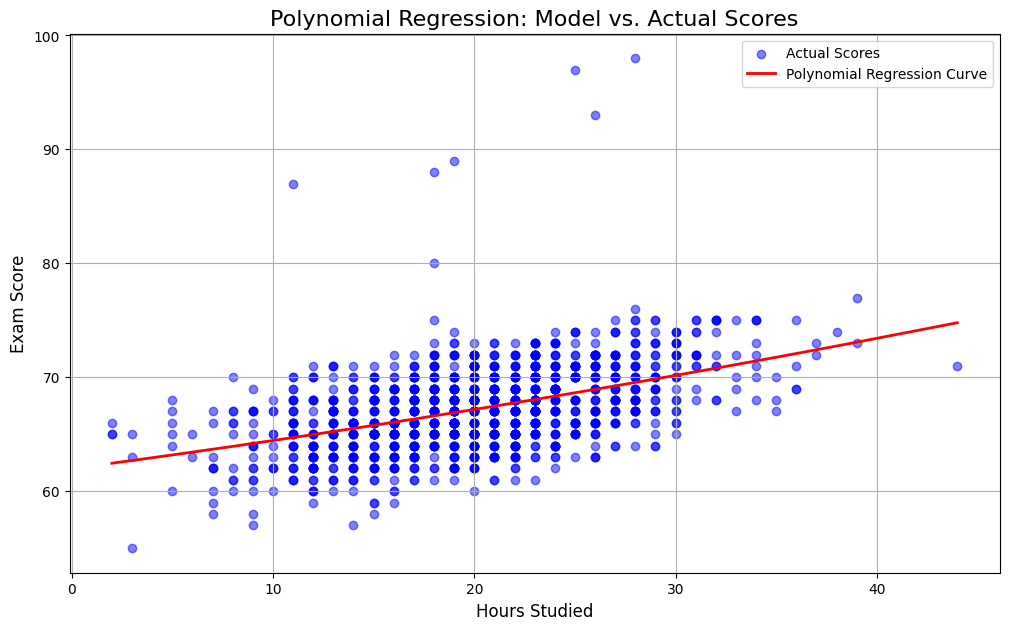

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

try:
    full_data = pd.read_csv('StudentPerformanceFactors.csv')
    score_data = full_data[['Hours_Studied', 'Exam_Score']]
    X = score_data[['Hours_Studied']]
    y = score_data['Exam_Score']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    poly_features = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    poly_regressor = LinearRegression()
    poly_regressor.fit(X_train_poly, y_train)
    
    print("--- Prerequisite Data and Model Ready ---")

except FileNotFoundError:
    print("Error: 'StudentPerformanceFactors.csv' not found. Please ensure the file is in the correct directory.")
except Exception as e:
    print(f"An error occurred during data setup: {e}")

print("\n" + "="*50 + "\n")

print("--- Generating Polynomial Regression Plot ---")

plt.figure(figsize=(12, 7))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Scores')

X_test_sorted = np.sort(X_test, axis=0)
X_test_poly_sorted = poly_features.transform(X_test_sorted)
y_pred_poly_curve = poly_regressor.predict(X_test_poly_sorted)

plt.plot(X_test_sorted, y_pred_poly_curve, color='red', linewidth=2, label='Polynomial Regression Curve')

plt.title('Polynomial Regression: Model vs. Actual Scores', fontsize=16)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()

In [4]:
import pandas as pd
import numpy as np

try:
    full_data = pd.read_csv('StudentPerformanceFactors.csv')
    print("--- Original Dataset Loaded Successfully ---")
except FileNotFoundError:
    print("Error: 'StudentPerformanceFactors.csv' not found. Please ensure the file is in the correct directory.")
except Exception as e:
    print(f"An error occurred during data setup: {e}")

print("\n" + "="*50 + "\n")

feature_columns = [
    'Hours_Studied', 
    'Previous_Scores', 
    'Attendance', 
    'Parental_Involvement', 
    'Teacher_Quality',
    'Exam_Score' 
]
multi_data = full_data[feature_columns].copy() 
print("--- Step 1: Selected Features ---")
print("Initial data with selected features:")
print(multi_data.head())
print("\nChecking for missing values:")
print(multi_data.isnull().sum())
print("\n" + "="*50 + "\n")

mode_teacher_quality = multi_data['Teacher_Quality'].mode()[0]
multi_data['Teacher_Quality'].fillna(mode_teacher_quality, inplace=True)

print("--- Step 2: Handled Missing Values ---")
print(f"Filled missing 'Teacher_Quality' values with '{mode_teacher_quality}'.")
print("\nChecking for missing values again:")
print(multi_data.isnull().sum())
print("\n" + "="*50 + "\n")

X_multi = pd.get_dummies(multi_data, columns=['Parental_Involvement', 'Teacher_Quality'], drop_first=True)

y_multi = X_multi['Exam_Score']
X_multi = X_multi.drop('Exam_Score', axis=1)

print("--- Step 3: Encoded Categorical Features ---")
print("The final preprocessed dataset for the model (first 5 rows):")
print(X_multi.head())
print("\nFinal dataset info:")
X_multi.info()



--- Original Dataset Loaded Successfully ---


--- Step 1: Selected Features ---
Initial data with selected features:
   Hours_Studied  Previous_Scores  Attendance Parental_Involvement  \
0             23               73          84                  Low   
1             19               59          64                  Low   
2             24               91          98               Medium   
3             29               98          89                  Low   
4             19               65          92               Medium   

  Teacher_Quality  Exam_Score  
0          Medium          67  
1          Medium          61  
2          Medium          74  
3          Medium          71  
4            High          70  

Checking for missing values:
Hours_Studied            0
Previous_Scores          0
Attendance               0
Parental_Involvement     0
Teacher_Quality         78
Exam_Score               0
dtype: int64


--- Step 2: Handled Missing Values ---
Filled missing 'Teacher

C:\Users\rajaz\AppData\Local\Temp\ipykernel_27604\284013519.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  multi_data['Teacher_Quality'].fillna(mode_teacher_quality, inplace=True)


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

try:
    full_data = pd.read_csv('StudentPerformanceFactors.csv')
    print("--- Prerequisite Data Loaded ---")

    simple_data = full_data[['Hours_Studied', 'Exam_Score']]
    X_simple = simple_data[['Hours_Studied']]
    y_simple = simple_data['Exam_Score']
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)
    simple_regressor = LinearRegression().fit(X_train_s, y_train_s)
    r2_simple = simple_regressor.score(X_test_s, y_test_s)

    poly_features = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train_s)
    X_test_poly = poly_features.transform(X_test_s)
    poly_regressor = LinearRegression().fit(X_train_poly, y_train_s)
    r2_poly = poly_regressor.score(X_test_poly, y_test_s)
    
    print("--- Previous Model Scores Calculated ---")

except FileNotFoundError:
    print("Error: 'StudentPerformanceFactors.csv' not found.")
except Exception as e:
    print(f"An error occurred during data setup: {e}")

print("\n" + "="*50 + "\n")

feature_columns = ['Hours_Studied', 'Previous_Scores', 'Attendance', 'Parental_Involvement', 'Teacher_Quality', 'Exam_Score']
multi_data = full_data[feature_columns].copy()
mode_teacher_quality = multi_data['Teacher_Quality'].mode()[0]
multi_data['Teacher_Quality'] = multi_data['Teacher_Quality'].fillna(mode_teacher_quality)
X_multi = pd.get_dummies(multi_data, columns=['Parental_Involvement', 'Teacher_Quality'], drop_first=True)
y_multi = X_multi.pop('Exam_Score') 

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)
print("--- Final Dataset Ready for Training ---")
print(f"Features for Multiple Regression: {list(X_multi.columns)}")
print("\n" + "="*50 + "\n")

multi_regressor = LinearRegression()
multi_regressor.fit(X_train_m, y_train_m)
print("--- Multiple Regression Model Trained Successfully ---")
print("\n" + "="*50 + "\n")

y_pred_multi = multi_regressor.predict(X_test_m)
r2_multi = metrics.r2_score(y_test_m, y_pred_multi)
mae_multi = metrics.mean_absolute_error(y_test_m, y_pred_multi)

print("--- Multiple Regression Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae_multi:.2f}")
print(f"R-squared (R²): {r2_multi:.2f}")
print("\n" + "="*50 + "\n")


print("--- Final Model Comparison ---")
comparison_results = {
    "Model": ["1. Simple Linear Regression", "2. Polynomial Regression", "3. Multiple Linear Regression"],
    "Features": ["Hours_Studied", "Hours_Studied^2", "Multiple Features"],
    "R-squared (R²)": [f"{r2_simple:.4f}", f"{r2_poly:.4f}", f"{r2_multi:.4f}"]
}
results_df = pd.DataFrame(comparison_results)
print(results_df)

print("\n--- Conclusion ---")
print(f"The Multiple Linear Regression model is the clear winner, explaining approximately {r2_multi:.0%} of the variance in exam scores!")



--- Prerequisite Data Loaded ---
--- Previous Model Scores Calculated ---


--- Final Dataset Ready for Training ---
Features for Multiple Regression: ['Hours_Studied', 'Previous_Scores', 'Attendance', 'Parental_Involvement_Low', 'Parental_Involvement_Medium', 'Teacher_Quality_Low', 'Teacher_Quality_Medium']


--- Multiple Regression Model Trained Successfully ---


--- Multiple Regression Model Performance ---
Mean Absolute Error (MAE): 1.22
R-squared (R²): 0.66


--- Final Model Comparison ---
                           Model           Features R-squared (R²)
0    1. Simple Linear Regression      Hours_Studied         0.2320
1       2. Polynomial Regression    Hours_Studied^2         0.2328
2  3. Multiple Linear Regression  Multiple Features         0.6585

--- Conclusion ---
The Multiple Linear Regression model is the clear winner, explaining approximately 66% of the variance in exam scores!


--- Prerequisite Model Trained and Predictions Made ---


--- Generating Final Performance Plot ---


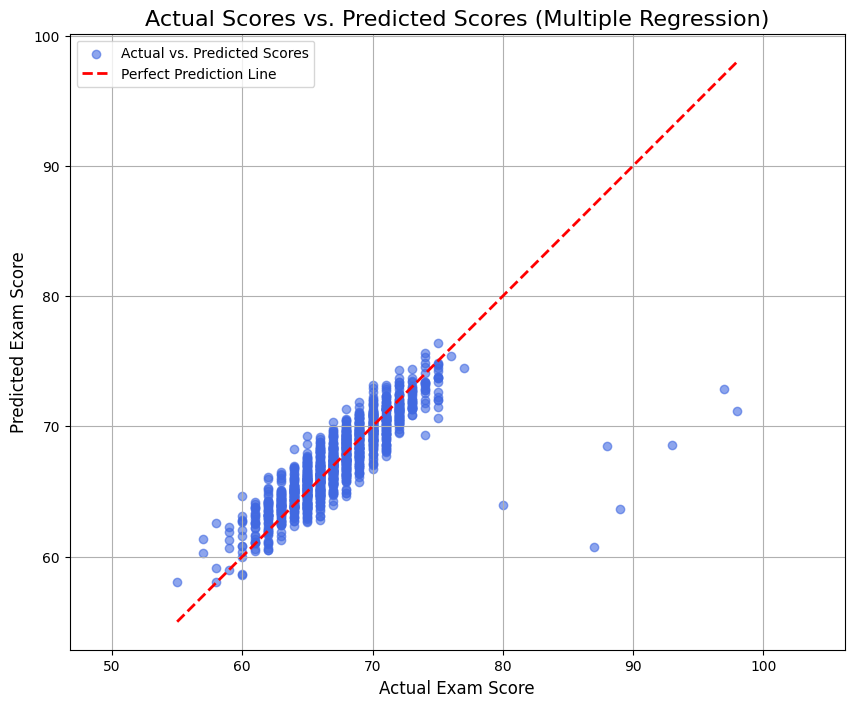

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

try:
    full_data = pd.read_csv('StudentPerformanceFactors.csv')

    feature_columns = ['Hours_Studied', 'Previous_Scores', 'Attendance', 'Parental_Involvement', 'Teacher_Quality', 'Exam_Score']
    multi_data = full_data[feature_columns].copy()
    mode_teacher_quality = multi_data['Teacher_Quality'].mode()[0]
    multi_data['Teacher_Quality'] = multi_data['Teacher_Quality'].fillna(mode_teacher_quality)
    X_multi = pd.get_dummies(multi_data, columns=['Parental_Involvement', 'Teacher_Quality'], drop_first=True)
    y_multi = X_multi.pop('Exam_Score')

    X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)
    multi_regressor = LinearRegression()
    multi_regressor.fit(X_train_m, y_train_m)
    
    y_pred_multi = multi_regressor.predict(X_test_m)
    
    print("--- Prerequisite Model Trained and Predictions Made ---")

except FileNotFoundError:
    print("Error: 'StudentPerformanceFactors.csv' not found.")
except Exception as e:
    print(f"An error occurred during data setup: {e}")

print("\n" + "="*50 + "\n")

print("--- Generating Final Performance Plot ---")

plt.figure(figsize=(10, 8))
plt.scatter(y_test_m, y_pred_multi, alpha=0.6, color='royalblue', label='Actual vs. Predicted Scores')

min_val = min(y_test_m.min(), y_pred_multi.min())
max_val = max(y_test_m.max(), y_pred_multi.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2, linestyle='--', label='Perfect Prediction Line')

plt.title('Actual Scores vs. Predicted Scores (Multiple Regression)', fontsize=16)
plt.xlabel('Actual Exam Score', fontsize=12)
plt.ylabel('Predicted Exam Score', fontsize=12)
plt.legend()
plt.grid(True)
plt.axis('equal') 

plt.show()

